# Data Analysis

The aim of this Capstone project is to consolidate the knowledge, skills and competences acquired by learners during this programme. In this project students will select, specify, design, justify and implement a data analytics investigation that makes use of large data sets. The project will necessarily require data ingestion, wrangling, computation and analyses, and the production and presentation of a project and report. Students are guided by faculty in the selection of a data set, scope of investigation, initial exploratory data analysis, and formulation of hypotheses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ast
import re

In [2]:
deck_df = pd.read_csv("data/data_decks_cleaned.csv")

Lets see if we can plot anything

In [3]:
%matplotlib inline

In [4]:
deck_df.head()

,Unnamed: 0,deck_id,deck_name,deck_wins,deck_losses,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,...,Zysysyx Shockworm,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion
0,0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,True,True,True,False,False,...,0,0,0,0,0,0,0,0,1,True
1,1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,True,False,True,False,True,...,0,0,0,0,0,0,0,0,-2,True
2,2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,True,False,True,True,False,...,0,0,0,0,0,0,0,1,1,True
3,3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,False,False,True,False,True,...,0,0,0,0,0,0,0,0,0,True
4,4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,False,False,False,True,True,...,0,1,0,0,0,0,1,0,4,False


In [5]:
deck_df.describe()

,Unnamed: 0,deck_wins,deck_losses,1-2 Punch,A Fair Game,Abond the Armorsmith,Agent Hoo-man,Ammonia Clouds,Anahita the Trader,Ancient Bear,...,Zorg,Zysysyx Shockworm,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score
count,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,...,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000
mean,33660.000000,2.520833,2.340949,0.066294,0.025638,0.070513,0.066606,0.103593,0.007977,0.139615,...,0.064660,0.068909,0.115061,0.010101,0.023633,0.073424,0.028253,0.123127,0.075638,0.179884
std,19434.043073,2.452996,1.786724,0.298569,0.160109,0.309012,0.300557,0.368056,0.089952,0.434456,...,0.266174,0.305654,0.393665,0.103355,0.164938,0.311640,0.179880,0.411228,0.321604,2.468806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.000000
25%,16830.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,33660.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50490.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,67320.000000,40.000000,39.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,...,3.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.000000,5.000000,4.000000,26.000000


In [6]:
decks = deck_df[['deck_wins','deck_losses', 'score', 'expansion']]
decks.head()

,deck_wins,deck_losses,score,expansion
0,2,1,1,True
1,1,3,-2,True
2,2,1,1,True
3,4,4,0,True
4,8,4,4,False


In [7]:
deck_exp = decks.groupby('expansion')
deck_exp.size()

expansion
False    43749
True     23572
dtype: int64

In [8]:
deck_exp_totals = deck_exp.sum()
deck_exp_totals.head()

,deck_wins,deck_losses,score
expansion,,,
False,118512,106001,12511
True,51193,51594,-401


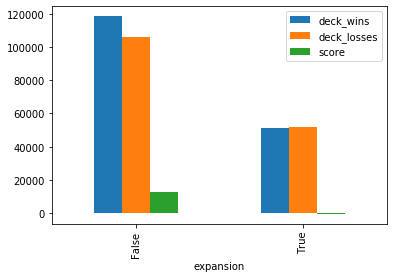

In [9]:
my_plot = deck_exp_totals.plot(kind='bar')

In [10]:
deck_df.head()

,Unnamed: 0,deck_id,deck_name,deck_wins,deck_losses,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,...,Zysysyx Shockworm,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion
0,0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,True,True,True,False,False,...,0,0,0,0,0,0,0,0,1,True
1,1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,True,False,True,False,True,...,0,0,0,0,0,0,0,0,-2,True
2,2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,True,False,True,True,False,...,0,0,0,0,0,0,0,1,1,True
3,3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,False,False,True,False,True,...,0,0,0,0,0,0,0,0,0,True
4,4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,False,False,False,True,True,...,0,1,0,0,0,0,1,0,4,False


---------------------

Guide for random forests used here: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf=RandomForestClassifier(n_estimators=100)

In [14]:
x = deck_df
x = x.drop("deck_id", axis=1)
x = x.drop("deck_name", axis=1)
x = x.drop("deck_wins", axis=1)
x = x.drop("deck_losses", axis=1)
x = x.drop("score", axis=1)
y = deck_df[['score']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [16]:
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

get a regression value - r square version. 

In [17]:
y_pred=clf.predict(x_test)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: -0.10546966318453488


try a few different models to see what would work - neural net? might try something online.


In [19]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Unnamed: 0               0.025656
Mother                   0.006401
Labwork                  0.005678
Dust Imp                 0.005325
Shooler                  0.005206
Charette                 0.005184
Punch                    0.005025
Wild Wormhole            0.004846
Miasma                   0.004798
Titan Mechanic           0.004725
Umbra                    0.004706
Nerve Blast              0.004676
Library of Babble        0.004566
Regrowth                 0.004511
Full Moon                0.004452
Bad Penny                0.004358
Blinding Light           0.004354
Ganger Chieftain         0.004319
Gauntlet of Command      0.004239
Tremor                   0.004174
Protect the Weak         0.004173
Take Hostages            0.004142
Coward’s End             0.004096
Shield of Justice        0.004070
Save the Pack            0.004057
Niffle Ape               0.003974
Lash of Broken Dreams    0.003881
Urchin                   0.003856
Yxilx Dominator          0.003801
Mindwarper    

---------

Instead of looking at all the cards, lets try a simplier model using just the houses

In [20]:
x = deck_df[['house_brobnar','house_dis','house_sanctum','house_mars','house_untamed','house_shadows', 'house_logos']]
y = deck_df[['score']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred=clf.predict(x_test)

In [23]:
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: -0.11433735169777015


In [24]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

house_shadows    0.407552
house_mars       0.152102
house_untamed    0.097916
house_logos      0.092828
house_dis        0.088894
house_sanctum    0.082113
house_brobnar    0.078595
dtype: float64

No handles with labels found to put in legend.


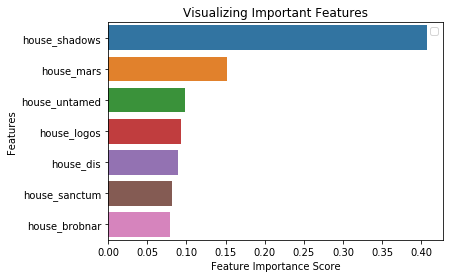

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Despite the poor predictive performance, the model has indicated the shadows house is the most important feature which matches the experience of players of the game.

Lets try a simple GLM

In [56]:
X = deck_df
X = X.drop("deck_id", axis=1)
X = X.drop("deck_name", axis=1)
X = X.drop("deck_wins", axis=1)
X = X.drop("deck_losses", axis=1)
X = X.drop("score", axis=1)
X = X.drop("house_shadows", axis=1)
X = X.drop("house_mars", axis=1)
X = X.drop("house_untamed", axis=1)
X = X.drop("house_logos", axis=1)
X = X.drop("house_dis", axis=1)
X = X.drop("house_sanctum", axis=1)
X = X.drop("house_brobnar", axis=1)

y = deck_df[['score']]

In [57]:
from sklearn import linear_model

In [58]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [59]:
predictions = lm.predict(X)
print(predictions)

[[-0.4111204 ]
 [-0.11526827]
 [ 0.63615752]
 ...
 [ 0.9416028 ]
 [-1.19951741]
 [-1.58877126]]


In [60]:
lm.score(X,y)

0.11838643648759783

In [62]:
coefDF = pd.DataFrame({'feature':X.columns, 'coef':lm.coef_[0]})

In [64]:
coefDF.sort_values(by=['coef'], ascending=False)

,feature,coef
20,Bait and Switch,0.491005
279,Martian Generosity,0.461183
394,Relentless Whispers,0.411778
312,Nature’s Call,0.402507
145,Finishing Blow,0.399702
219,Hypnotic Command,0.356997
373,Proclamation 346E,0.339180
259,Lights Out,0.328504
410,Routine Job,0.324438
541,Virtuous Works,0.322635


Despite the poor performance of the overall model, the list of coefficients does reflect the accepted wisdom of the player base who prize the card 'Bait and switch' above all others. The Dis Ambassador on the other hand which is at the very bottom of the rankings is a highly situational card that often is dissapointing to draw.

In [67]:
import pickle
filename = 'finalized_linear_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))